# Introduction

The purpose of the notebook is illustrate how matrix mathematics works in the context of images. Linear algebra is notoriously difficult to teach because it's difficult to visualize. However, I've found visualizing matrices as images to be incredibly helpful in my journey.

So, my aim is to introduce abstract matrix algebra concepts in the context of how they can be used to manipulate images.

Let's get to it!

An image is an array of shape $(height, width, channels)$ and can be in `RGB`, `BGR`, `HSB`, `HSV` or other image formats, for which `channels` is typically 3.

An important bit of terminology around matrices and arrays: An array is synonymous with a matrix (though there are minor differences in certain OOP programming languages like MatLab). I will use them interchangeably.

---

# What's the plan?

So, we're going to cover:
* Matrix creation and type casting
* Basic arithmetic operations
* Statistical operations
* Linear transformations (like rotation, shifting, flipping)
* Concatenation
* Index slicing
* Stacking

---

# The Right Tools For The Job

One of python's flagship packages is `numpy`, a scientific package that provides a plethora of functions to manipulate matrices. If you want to get deep into linear algebra, this is where you start. We're going to use numpy to manipulate our image matrices in cool ways!

Then, there's `OpenCV`. A computer vision library with tonnes of implementations for conventional computer vision methods. Including Gaussian blurring, Canny Edge and even Laplace transforms! it's built with numpy :)

Lastly, there's `matplotlib`. This package has a reputation for requiring a huge amount of code to display simple graphs. While the rumours are true, it provides great utility and also does a lot of heavy lifting without you noticing. If you're like me, then you're dumb enough to look at the source code. Trust me, it does a lot of secret heavy lifting...

---

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2

Line 1 `%matplotlib inline` instructs the notebook to display all graphs within the editor.

`matplotlib` typically spins up it's own widget in which it dispays graphs. We're overriding that so that we can view the graphs in Jupyter Notebook output cells and create a new cell for the graphs / images everytime you call a show or plot function.

---

## Matrix/Array Creation and Type Casting

There are many ways to create an array with numpy

In [2]:
# Create array from Python list

print(np.array([0,1,2,3,4]))

[0 1 2 3 4]


In [3]:
# Create array from Python range

print(np.array(range(0,5)))

[0 1 2 3 4]


In [4]:
# Create array from numpy range

print(np.arange(0,5))

[0 1 2 3 4]


In [5]:
# Like a Python range you can also specify a step count

print(np.arange(0,7,2))

[0 2 4 6]


In [6]:
# Create an array of zeros

print(np.zeros(5))

[0. 0. 0. 0. 0.]


In [7]:
# Create an array of ones

print(np.ones(5))

[1. 1. 1. 1. 1.]


You can also specify the precision of the matrix by specifying the data type it contains

In [8]:
# Unsigned 8 bit integer

print(np.arange(0,5, dtype='uint8'))

[0 1 2 3 4]


In [9]:
# Unsigned 16 bit integer

print(np.arange(0,5, dtype='uint16'))

[0 1 2 3 4]


In [10]:
# 32 bit float

print(np.arange(0,5, dtype='float32'))

[0. 1. 2. 3. 4.]


For more supported data types you can visit

https://numpy.org/devdocs/user/basics.types.html

You can also change the type of an array using the `astype()` function

In [11]:
integer_array_1 = np.arange(0,5, dtype='uint8')
float_array_1 = integer_array_1.astype('float32')

print(f'Integer array: {integer_array_1}')
print(f'Float array: {float_array_1}')

Integer array: [0 1 2 3 4]
Float array: [0. 1. 2. 3. 4.]


---

## Matrix Arithmetic

This may (or may not) come as a surprise to you but matrices have different kinds of arithmetic operations.

For example, multiplication, division and powers has several variations. We're going to focus on the two classes:
`Scalar Operations` and `Vector Operations`.

### Scalar (Elementwise) Operations

These are the kinds of operations everyone is most familiar with, they are also the most intuitive.

Operations of this type interact between individual corresponding elements of matrices and are referred to as _elementwise_ operations. For example, the element $a_{ij}$ of the matrix $A$ will interact with the $b_{ij}$ element of matrix $B$.

Some of these operations are called _Hadamard_ Operations.

---

#### Addition

Let $A = \begin{bmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{bmatrix},
 B = \begin{bmatrix}
b_{00} & b_{01} & b_{02} \\
b_{10} & b_{11} & b_{12} \\
b_{20} & b_{21} & b_{22}
\end{bmatrix}$

</br>

Then 
$A + B = 
\begin{bmatrix}
a_{00} + b_{00} & a_{01} + b_{01} & a_{02} + b_{02} \\
a_{10} + b_{10} & a_{11} + b_{11} & a_{12} + b_{12} \\
a_{20} + b_{20} & a_{21} + b_{21} & a_{22} + b_{22}
\end{bmatrix}$

</br>

For example:

Let
$A = \begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix},
 B = \begin{bmatrix}
0 & 0 & 0 \\
2 & 2 & 2 \\
0 & 0 & 0
\end{bmatrix}$

</br>

Then $A+B=
\begin{bmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
0 & 0 & 0
\end{bmatrix}$

In [12]:
# Operator: +

A = np.array([
    [1,1,1],
    [0,0,0],
    [0,0,0]
], dtype='uint8')

B = np.array([
    [0,0,0],
    [2,2,2],
    [0,0,0]
], dtype='uint8')

print(A+B)

[[1 1 1]
 [2 2 2]
 [0 0 0]]


---

#### Subtraction

Let $A = \begin{bmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{bmatrix},
 B = \begin{bmatrix}
b_{00} & b_{01} & b_{02} \\
b_{10} & b_{11} & b_{12} \\
b_{20} & b_{21} & b_{22}
\end{bmatrix}$

</br>

Then 
$A + B = 
\begin{bmatrix}
a_{00} - b_{00} & a_{01} - b_{01} & a_{02} - b_{02} \\
a_{10} - b_{10} & a_{11} - b_{11} & a_{12} - b_{12} \\
a_{20} - b_{20} & a_{21} - b_{21} & a_{22} - b_{22}
\end{bmatrix}$

</br>

For example:

Let
$A = \begin{bmatrix}
3 & 3 & 3 \\
3 & 3 & 3 \\
3 & 3 & 3
\end{bmatrix},
 B = \begin{bmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
3 & 3 & 3
\end{bmatrix}$

</br>

Then
$A - B = \begin{bmatrix}
2 & 2 & 2 \\
1 & 1 & 1 \\
0 & 0 & 0
\end{bmatrix}$

In [13]:
# Operator: -

A = np.array([
    [3,3,3],
    [3,3,3],
    [3,3,3]
], dtype='uint8')

B = np.array([
    [1,1,1],
    [2,2,2],
    [3,3,3]
], dtype='uint8')

print(A-B)

[[2 2 2]
 [1 1 1]
 [0 0 0]]


---

#### Multiplication (Hadamard Product)
Conventional Matrix multiplication has you multiple successive rows with columns. _Hadamard_ multiplication takes two elements with the same indices from different matrices and multiplies them together.

**NOTE** the symbol used to indicate _Hadamard_ multiplication of matrices is $\circ$ but the product between elements is the normal $\times$ symbol

Let $A = \begin{bmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{bmatrix},
 B = \begin{bmatrix}
b_{00} & b_{01} & b_{02} \\
b_{10} & b_{11} & b_{12} \\
b_{20} & b_{21} & b_{22}
\end{bmatrix}$

</br>

Then 
$A \circ B = 
\begin{bmatrix}
a_{00} \times b_{00} & a_{01} \times b_{01} & a_{02} \times b_{02} \\
a_{10} \times b_{10} & a_{11} \times b_{11} & a_{12} \times b_{12} \\
a_{20} \times b_{20} & a_{21} \times b_{21} & a_{22} \times b_{22}
\end{bmatrix}$

</br>

For example:

Let
$A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix},
 B = \begin{bmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
3 & 3 & 3
\end{bmatrix}$

</br>

$A \circ B = \begin{bmatrix}
1 & 2 & 3 \\
8 & 10 & 12 \\
21 & 24 & 27
\end{bmatrix}$

In [14]:
# Operator: *

A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype='uint8')

B = np.array([
    [1,1,1],
    [2,2,2],
    [3,3,3]
], dtype='uint8')

print(A*B)

[[ 1  2  3]
 [ 8 10 12]
 [21 24 27]]


---

#### Division (Hadamard Division)
Conventionally, the idea of dividing a matrix by another matrix doesn't really make sense (which is part of the reason why determinants were invented) because matrices are treated as entire systems. However, if you think about it in an _elementwise-kind-of-way_ then it does.

**NOTE** the symbol used to indicate _Hadamard_ division of matrices is $\oslash$ but the product between elements is the normal `\` symbol but to make things more compact I'm using fractional notation.

Let $A = \begin{bmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{bmatrix},
 B = \begin{bmatrix}
b_{00} & b_{01} & b_{02} \\
b_{10} & b_{11} & b_{12} \\
b_{20} & b_{21} & b_{22}
\end{bmatrix}$

</br>

Then 
$A \oslash B = 
\begin{bmatrix}
\frac{a_{00}}{b_{00}} & \frac{a_{01}}{b_{01}} & \frac{a_{02}}{b_{02}} \\
\frac{a_{10}}{b_{10}} & \frac{a_{11}}{b_{11}} & \frac{a_{12}}{b_{12}} \\
\frac{a_{20}}{b_{20}} & \frac{a_{21}}{b_{21}} & \frac{a_{22}}{b_{22}}
\end{bmatrix}$

</br>

For example:

Let
$A =
\begin{bmatrix}
1 & 2 & 3 \\
8 & 10 & 12 \\
21 & 24 & 27
\end{bmatrix}, 
B = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}$

</br>

Then
$A \oslash B =
\begin{bmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
3 & 3 & 3
\end{bmatrix}$

Before getting into code, there's something to be said about numpy's division operators. In numpy there are two: the **_floor division_** operator and the **_true division_** operator.

The distiction is that true division is normal division, it gives you a decimal result. The floor division operator truncates the decimals and return an integer.

In [15]:
# Operator (Floor division): //

A = np.array([[1,2,3],[8,10,12],[21,24,27]], dtype='uint8')
B = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype='uint8')

print(A//B)

[[1 1 1]
 [2 2 2]
 [3 3 3]]


In [16]:
# Operator (True division): /

A = np.array([[1,2,3],[8,10,12],[21,24,27]], dtype='uint8')
B = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype='uint8')

print(A/B)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


---

### Power (Hadamard Power)

Conventionally, raising a matrix to a power involves multiplying the matrix by itself a number of times equal to the power (it has to be an integer). However, with _Hadamard_ power, you raise each element to the power (just like with product and division).

**NOTE** The symbol used here is the same as multiplication $\circ$ but it's used as the exponent. Because fractional exponents are permitted, roots are calculated the same way as integer powers. Reciprocals have their own function.

---

#### Integer Powers

Let
$A = \begin{bmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{bmatrix}$

</br>

Then
$A^{\circ2} = \begin{bmatrix}
a_{00}^2 & a_{01}^2 & a_{02}^2 \\
a_{10}^2 & a_{11}^2 & a_{12}^2 \\
a_{20}^2 & a_{21}^2 & a_{22}^2
\end{bmatrix}$

</br>

For example:

Let
$A =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}$

</br>

Then
$A^{\circ2} =
\begin{bmatrix}
1 & 4 & 9 \\
16 & 25 & 36 \\
49 & 64 & 81
\end{bmatrix}$

In [17]:
# Operator: **

A = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype='uint8')

print(A**2)

[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


---

#### Fractional Powers

Let's take a classic example, the square root. Raising an element to the power of a half gives you the square root, same with _Hadamard_.

Let
$A = \begin{bmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{bmatrix}$

</br>

Then
$A^{\circ\frac{1}{2}} = \begin{bmatrix}
a_{00}^\frac{1}{2} & a_{01}^\frac{1}{2} & a_{02}^\frac{1}{2} \\
a_{10}^\frac{1}{2} & a_{11}^\frac{1}{2} & a_{12}^\frac{1}{2} \\
a_{20}^\frac{1}{2} & a_{21}^\frac{1}{2} & a_{22}^\frac{1}{2}
\end{bmatrix}
=
\begin{bmatrix}
\sqrt{a_{00}} & \sqrt{a_{01}} & \sqrt{a_{02}} \\
\sqrt{a_{10}} & \sqrt{a_{11}} & \sqrt{a_{12}} \\
\sqrt{a_{20}} & \sqrt{a_{21}} & \sqrt{a_{22}}
\end{bmatrix}$

</br>

For example:

Let
$A =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}$

</br>

Then
$A^{\frac{1}{2}} =
\begin{bmatrix}
1.00 & 0.41 & 1.73 \\
2.00 & 2.24 & 2.45 \\
2.65 & 2.83 & 3.00
\end{bmatrix}$

</br>

Rounded for brevity to 2 decimal places.

In [18]:
# Operator: **

A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]]
)

print(np.round(A**0.5, 2))

[[1.   1.41 1.73]
 [2.   2.24 2.45]
 [2.65 2.83 3.  ]]


---

#### Reciprocals

Reciprocals have their own function but you can also use the divison operators `/` and `//`.

Let
$A^{\circ-1} = \begin{bmatrix}
a_{00}^{-1} & a_{01}^{-1} & a_{02}^{-1} \\
a_{10}^{-1} & a_{11}^{-1} & a_{12}^{-1} \\
a_{20}^{-1} & a_{21}^{-1} & a_{22}^{-1}
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{a_{00}} & \frac{1}{a_{01}} & \frac{1}{a_{02}} \\
\frac{1}{a_{10}} & \frac{1}{a_{11}} & \frac{1}{a_{12}} \\
\frac{1}{a_{20}} & \frac{1}{a_{21}} & \frac{1}{a_{22}}
\end{bmatrix}$

</br>

For example:

Let
$A =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}$

</br>

Then
$A^{\circ-1} =
\begin{bmatrix}
1.00 & 0.50 & 0.33 \\
0.25 & 0.20 & 1.17 \\
0.14 & 0.12 & 0.11
\end{bmatrix}$

In [19]:
# Operator (True Division): /

A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]]
)

print(np.round(1/A, 2))

[[1.   0.5  0.33]
 [0.25 0.2  0.17]
 [0.14 0.12 0.11]]


In [20]:
# Operator (Floor Division): //

A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]]
)

print(1//A)

[[1 0 0]
 [0 0 0]
 [0 0 0]]


---

### Scalar Operations Applied to Images

Now that we've gone through some formal and some not-so-formal definitions of what these operators do. Let's make some pretty pictures.

In true milennial fashion, we're going to make a smiling emoji. That's the life we live now... I've accepted it, you should too...

We're going to start off with grayscale and then move onto colour. Below is a picture of the little guy we're going to make. It's an (8,9,1) shape image. The straight forward way would be to create the array and manually assign the entries to some numerical value and then display the image.

**NOTE** We use `uint8` because that's the typical type that images expect, our values can be anything from 0 to 255.

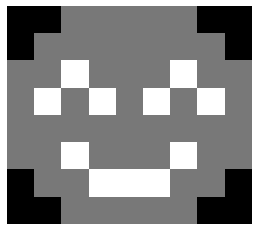

In [21]:
emoji_full = np.array([
    [0,0,120,120,120,120,120,0,0],
    [0,120,120,120,120,120,120,120,0],
    [120,120,255,120,120,120,255,120,120],
    [120,255,120,255,120,255,120,255,120],
    [120,120,120,120,120,120,120,120,120],
    [120,120,255,120,120,120,255,120,120],
    [0,120,120,255,255,255,120,120,0],
    [0,0,120,120,120,120,120,0,0]
], dtype='uint8')

plt.axis('off') # disabled axes for aesthetic reasons
plt.imshow(emoji_full, cmap='gray')
plt.show()

---

Easy right? Now let's have a look at what happens when we augment the images using scalar operations.

First up is addition. We're going to take the emoji and iteratively add values to each pixel.

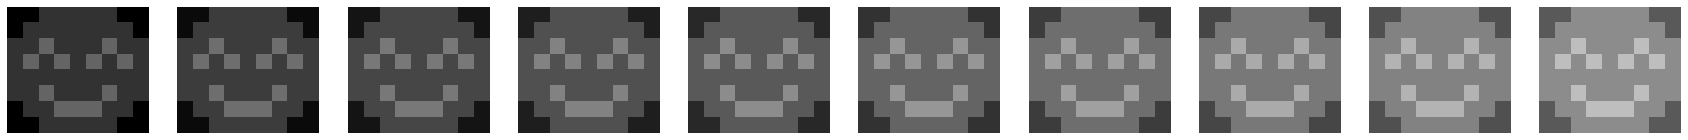

In [22]:
# Emoji with lower pixel values
emoji_full = np.array([
    [0,0,50,50,50,50,50,0,0],
    [0,50,50,50,50,50,50,50,0],
    [50,50,100,50,50,50,100,50,50],
    [50,100,50,100,50,100,50,100,50],
    [50,50,50,50,50,50,50,50,50],
    [50,50,100,50,50,50,100,50,50],
    [0,50,50,100,100,100,50,50,0],
    [0,0,50,50,50,50,50,0,0]
], dtype='uint8')

# Number of times to add to the pixels
no_permutations = 10

fig = plt.figure(figsize=(30,20))

for i in range(0, no_permutations):
    fig.add_subplot(1,no_permutations, i+1)
    plt.axis('off')
    plt.imshow(emoji_full+i*10, cmap='gray', vmin=0, vmax=255)

plt.show()

Since grayscale works on a colour band of black to white with gray between, higher values get progressively lighter. Which is evident from the above plot. This is an example of constant scaling. The opposite of this operation is equivalent to subtraction.

---

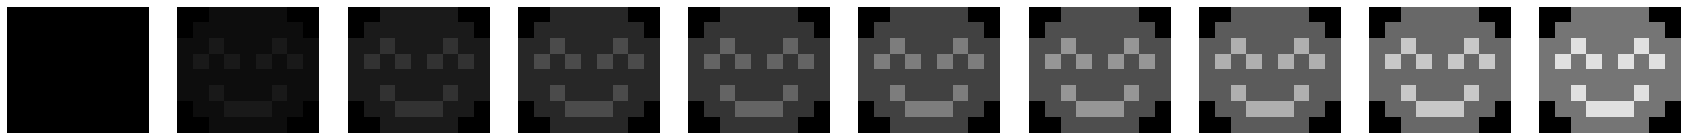

In [23]:
# Emoji with lower pixel values
emoji_full = np.array([
    [0,0,13,13,13,13,13,0,0],
    [0,13,13,13,13,13,13,13,0],
    [13,13,25,13,13,13,25,13,13],
    [13,25,13,25,13,25,13,25,13],
    [13,13,13,13,13,13,13,13,13],
    [13,13,25,13,13,13,25,13,13],
    [0,13,13,25,25,25,13,13,0],
    [0,0,13,13,13,13,13,0,0]
], dtype='uint8')

# Number of times to multiply to the pixels
no_permutations = 10

fig = plt.figure(figsize=(30,20))

for i in range(0, no_permutations):
    fig.add_subplot(1,no_permutations, i+1)
    plt.axis('off')
    plt.imshow(emoji_full*i, cmap='gray', vmin=0, vmax=255)

plt.show()

The above ouput is an example of multiplicative scaling. There is greater contrast between pixel values, especially at higher values. The opposite of this operation is equivalent to hadamard division.

---

So far these operations have been quite boring BUT used differently they can be quite powerful! Instead of incrementally changing existing values, we're going to combine different matrices (using scalar operations) to recreate the smiley emoji.

**NOTE** Matplotlib automatically scales values the appropriate range. In the next few examples the pixels values are going to be very low. Between 0 and 2. These will be automaticall adjusted to the correct values in the 0 to 255 range.

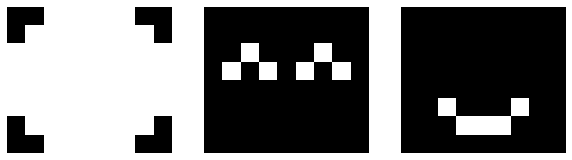

In [24]:
# Base
emoji_face = np.array([
    [0,0,1,1,1,1,1,0,0],
    [0,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,0],
    [0,0,1,1,1,1,1,0,0]
], dtype='uint8')

# Eyes
emoji_eyes = np.array([
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,1,0,0],
    [0,1,0,1,0,1,0,1,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0]
], dtype='uint8')

# Smile
emoji_smile = np.array([
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,1,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0]
], dtype='uint8')

fig = plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(emoji_face, cmap='gray')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(emoji_eyes, cmap='gray')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(emoji_smile, cmap='gray')
plt.show()

I've separated the components of the emoji into different matrices, face, eyes and smile. As shown above. Now, if we add them all together we'll get the same picture.

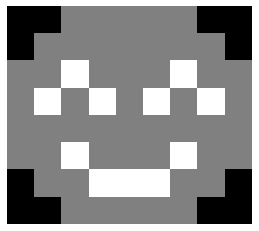

In [25]:
plt.axis('off')
plt.imshow(emoji_face + emoji_eyes + emoji_smile, cmap='gray')
plt.show()

This approach opens up some pretty cool opportunities. We'll be able to change the values of the individual components and then add them together, granting us fine control.

For example, let's say we want to make the eyes brighter.

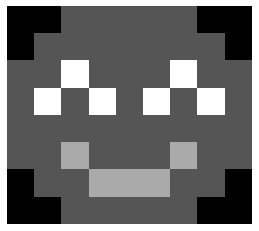

In [26]:
plt.axis('off')
plt.imshow(emoji_face + 2*emoji_eyes + emoji_smile, cmap='gray')
plt.show()

Done! What we've done, by adding the components together and changing only parts we're interested in, is called a `linear combination` (This is where matrix terminology starts popping up). The more familiar form should be something like `a + b + c = d`. In this case, `a` is the face, `b` is the eyes and `c` is the smile. The result, `d`, is the whole image.

Similar results can be achieved by using any of the other scalar arithmetic operators.

---

# Matrix Concatenation

Concatenation is the act of adding something at the end of another thing. In the context of matrices, it would be equivalent to adding two (or more) matrices along a given dimension. The resulting matrix would be a bigger matrix.

Let me show you. We're going to build the emoji again, but were going concatenate slices of it along it's two dimensions.

### Horizontal Slices

I've sliced the original emoji image into 8 horizontal pieces, now if we plot the individual slices we can see how they contribute to the over all picture. For convenience, I've also set the minimum values to 0 and the maximum values to 2. Now matplotlib will normalize those values to the 0-255 grayscale range.

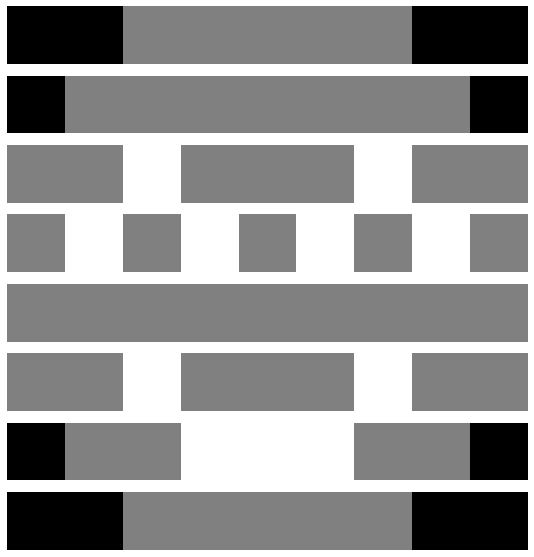

In [27]:
hslice_0 = np.array([[0,0,1,1,1,1,1,0,0]], dtype='uint8')
hslice_1 = np.array([[0,1,1,1,1,1,1,1,0]], dtype='uint8')
hslice_2 = np.array([[1,1,2,1,1,1,2,1,1]], dtype='uint8')
hslice_3 = np.array([[1,2,1,2,1,2,1,2,1]], dtype='uint8')
hslice_4 = np.array([[1,1,1,1,1,1,1,1,1]], dtype='uint8')
hslice_5 = np.array([[1,1,2,1,1,1,2,1,1]], dtype='uint8')
hslice_6 = np.array([[0,1,1,2,2,2,1,1,0]], dtype='uint8')
hslice_7 = np.array([[0,0,1,1,1,1,1,0,0]], dtype='uint8')
hslices = [hslice_0, hslice_1, hslice_2, hslice_3, hslice_4, hslice_5, hslice_6, hslice_7]

fig = plt.figure(figsize=(10,10))
args = {
    'cmap':'gray',
    'vmin':0,
    'vmax':2
}

for i in range(1,9):
    fig.add_subplot(8,1,i)
    plt.axis('off')
    plt.imshow(hslices[i-1], **args)

plt.show()

---

Creepy right? We'll, we're not done yet! The next plot is for vertical slices!

### Vertical Slices

I've sliced the original image into 9 vertical pieces, plotting them similary as before.

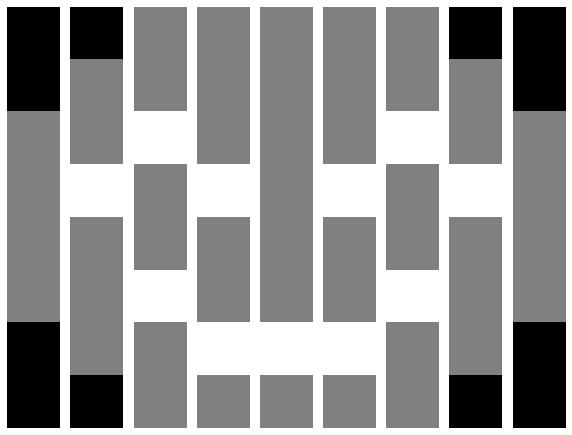

In [28]:
# Vertical slices
vslice_0 = np.array([[0],[0],[1],[1],[1],[1],[0],[0]], dtype='uint8')
vslice_1 = np.array([[0],[1],[1],[2],[1],[1],[1],[0]], dtype='uint8')
vslice_2 = np.array([[1],[1],[2],[1],[1],[2],[1],[1]], dtype='uint8')
vslice_3 = np.array([[1],[1],[1],[2],[1],[1],[2],[1]], dtype='uint8')
vslice_4 = np.array([[1],[1],[1],[1],[1],[1],[2],[1]], dtype='uint8')
vslice_5 = np.array([[1],[1],[1],[2],[1],[1],[2],[1]], dtype='uint8')
vslice_6 = np.array([[1],[1],[2],[1],[1],[2],[1],[1]], dtype='uint8')
vslice_7 = np.array([[0],[1],[1],[2],[1],[1],[1],[0]], dtype='uint8')
vslice_8 = np.array([[0],[0],[1],[1],[1],[1],[0],[0]], dtype='uint8')
vslices = [vslice_0, vslice_1, vslice_2, vslice_3, vslice_4, vslice_5, vslice_6, vslice_7, vslice_8]

fig = plt.figure(figsize=(10,10))
args = {
    'cmap':'gray',
    'vmin':0,
    'vmax':2
}

for i in range(1,10):
    fig.add_subplot(1,9,i)
    plt.axis('off')
    plt.imshow(vslices[i-1], **args)

plt.show()

Isn't it cool how a mildy cute smiley emoji can be turned into a creepy **_af_** grayscale jack-o'-lantern?

### Concatenating Along the Horizontal and Vertical Axis

We can concatenate along the horizontal and vertical axes to rebuild the original image.

**Note**: The horizontal axis is `0` and the vertical axis is `1`.

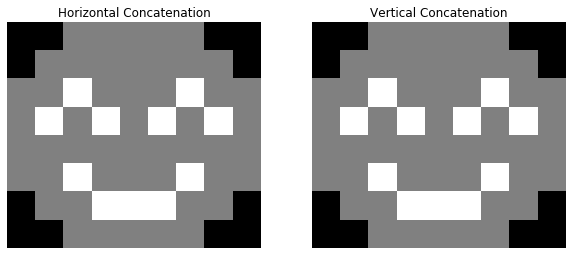

In [29]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(1,2,1)
plt.imshow(np.concatenate(tuple(hslices), axis=0), cmap='gray')
plt.title('Horizontal Concatenation')
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(np.concatenate(tuple(vslices), axis=1), cmap='gray')
plt.title('Vertical Concatenation')
plt.axis('off')

plt.show()

---

So far so good but this grayscale is really boring don't you think?

Let's shift to colour!

### Concatenating Grayscale Images to Create Colour Images

Colour images have what are called `channels`. A channel represents the values of a given colour format.

Here are some examples:
* The channels in an $RGB$ image are (unsurprisingly): $Red$, $Green$ and $Blue$
* The channels in a $HSV$ image are: $Hue$, $Saturation$ and $Value$

So, we're going to build an image by building the individual channels of an image. More specifically, we're going to build a coloured smiley face! This is going to take a bit more work though...

We're going to take the emoji's face, eyes and smile components, modify them and then stick them together.

For the sake of not having long variables names I'm shortening `emoji face` to `ef`, `emoji_eyes` to `ee` and `emoji_smile` to `es`.

### A Different Kind of Face Time

Let's start by making a standard yellow emoji face. The colour I've chosen is `#FFE920`, $\color{#FFE920}{\textbf{which is this obnoxious colour}}$.

The channel values are (255, 233, 32) in `RGB` format. 

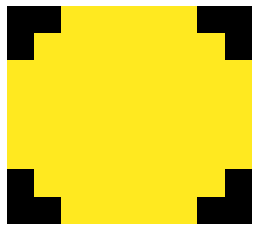

In [37]:
# Create a copy of emoji_face for each channel and change the values to suit our horrific yellow colour
ef_red = np.copy(emoji_face)*255
ef_green = np.copy(emoji_face)*233
ef_blue = np.copy(emoji_face)*32

# Stack the channels along the 'depth' (or 3D) axis.
coloured_face = np.dstack((ef_red, ef_green, ef_blue))

plt.imshow(coloured_face)
plt.axis('off')
plt.show()

The numpy method `dstack` is similar to `concatenate` except it stacks arrays along the depth axis. Useful for building images!

### A Different Kind of Eye Time?

Similar to the face, let's change colour of the eyes!

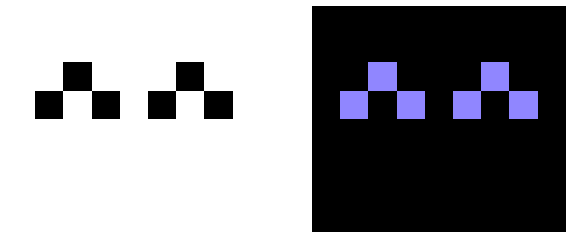

In [54]:
tmp = np.copy(emoji_eyes)*255
em_red = np.copy(cv2.bitwise_not(tmp))
em_green = np.copy(cv2.bitwise_not(tmp))
em_blue = np.copy(cv2.bitwise_not(tmp))

ee_red = np.copy(emoji_eyes)*144
ee_green = np.copy(emoji_eyes)*134
ee_blue = np.copy(emoji_eyes)*255

eye_mask = np.dstack((em_red, em_green, em_blue))

coloured_eyes = np.dstack((ee_red, ee_green, ee_blue))

fig = plt.figure(figsize=(10,10))

fig.add_subplot(1,2,1)
plt.imshow(eye_mask)
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(coloured_eyes)
plt.axis('off')
plt.show()

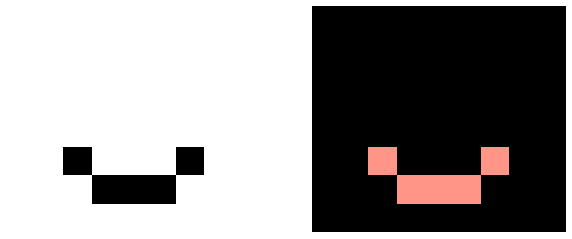

In [56]:
tmp = np.copy(emoji_smile)*255
em_red = np.copy(cv2.bitwise_not(tmp))
em_green = np.copy(cv2.bitwise_not(tmp))
em_blue = np.copy(cv2.bitwise_not(tmp))

es_red = np.copy(emoji_smile)*255
es_green = np.copy(emoji_smile)*149
es_blue = np.copy(emoji_smile)*135

smile_mask = np.dstack((em_red, em_green, em_blue))
coloured_smile = np.dstack((es_red, es_green, es_blue))

fig = plt.figure(figsize=(10,10))

fig.add_subplot(1,2,1)
plt.imshow(smile_mask)
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(coloured_smile)
plt.axis('off')
plt.show()

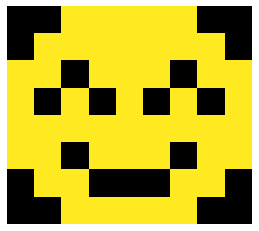

In [46]:
coloured_face = coloured_face * coloured_eyes * coloured_smile

plt.imshow(coloured_face)
plt.axis('off')
plt.show()

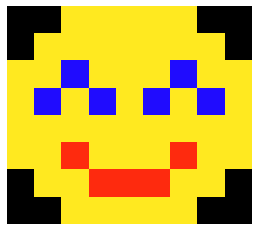

In [52]:
face_canvas = coloured_face*
coloured_face = coloured_face + coloured_eyes + coloured_smile
plt.imshow(coloured_face)
plt.axis('off')
plt.show()

---

In [ ]:
center = (150, 150)
(h, w) = (300, 300)

Now we're going to construct a white rectangular bar, small black square and a large black rectangle.
These will be our components. We do this by instantiating 3 numpy arrays filled with ones and zeros, for the
rectangular bar and small square and large rectangle, respectively.

In [ ]:
white_bar = np.multiply(np.ones((140, 20), dtype='uint8'), 255)
small_black_square = np.zeros((140, 140), dtype='uint8')
large_black_rectangle = np.zeros((160, 300), dtype='uint8')

I chose to use two different sized squares because it was easier to concantenate them that to modify a single square.
Which, is possible but for our purposes concententation is easier to follow...

I also multiplied the elements of the white bar by 255. This gives us a rectangular shaped array filled with 255's.
In terms of a grayscale image, this means that the rectangular bar is filled with white pixels. Since 255 represents maximum saturation in grayscale, which is white. Conversely, 0 represents black since it has no saturation. Values between 0 and 255 are varying kinds of grays.

Now we're going to concatenate the two small black squares and a white rectangle along the ```y-axis (axis 1)``` to create the top part of our image. Then, were going to concatenate the large black rectangle and the top part of the image along the ```x-axis (axis 0)``` to make our base image. Then, were going to show the result.

In [ ]:
img_top = np.concatenate((small_black_square, white_bar, small_black_square), axis=1)

base = np.concatenate((img_top, large_black_rectangle), axis=0)

plt.imshow(base, cmap='gray')
plt.show()

Cool, now were going to create a colour image. How?

An ```RGB``` image is effectively 3 arrays layered on top of each other. The top layer is interpreted as the amount of red in the image, the middle layer as the amount of green and the bottom layer as the amount of blue. The structure of the 3D array will differ for different colour formats, such as ```BGR```, ```HSV```, ```HSL```, as will there values!

But first, to prove a point, we're going to show one more matrix operation. Rotation.

In [ ]:
rotation_matrix_90 = cv2.getRotationMatrix2D(center, -90, 1.0)
rotation_matrix_180 = cv2.getRotationMatrix2D(center, -180, 1.0)
rotation_matrix_270 = cv2.getRotationMatrix2D(center, -270, 1.0)

Above are three matrices which represent different rotations, by -90, -180 and -270 degrees respectively. We're using a function from the OpenCV library to expedite the process. Later on we're going to cover how to build these rotations manually, from first principles.

### Rotation

Now, things get interesting! We're going to apply a -90 degree rotation to the base we made above.

In [ ]:
rotated = cv2.warpAffine(base, rotation_matrix_90, (w, h))

plt.imshow(rotated, cmap='gray')
plt.show()

As you can see, the base has been rotated! The convention in maths is that clockwise rotation is considered 'negative' and counter-clockwise is 'positive'. Hence why the angles above are all negative.

You don't have to be too concerned about the function ```warpAffine``` above. Changing the value of a matrix with some kind of operation is called a tranformation. Multiplying a matrix by another is a type of transformation called an 'Affine Transformation'. And rotation is done by multiplying two matrices together, as you will see later!

### Combining arrays to make new images

Now we're going to take the base image and combine it 3 ways. Once with a -90 rotated version of itself (like the one above) once again for each -180 and -270 rotation. We do this by taking the base image, rotating it and then adding values of the two matrices together.

The output of the 3 combinations will be displayed.

In [ ]:
red = cv2.warpAffine(base, rotation_matrix_90, (w, h)) + base
green = cv2.warpAffine(base.copy(), rotation_matrix_180, (w,h)) + base
blue = cv2.warpAffine(base.copy(), rotation_matrix_270, (w,h)) + base

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1)
plt.title('RED')
plt.imshow(red, cmap='gray')

fig.add_subplot(1, 3, 2)
plt.title('GREEN')
plt.imshow(green, cmap='gray')

fig.add_subplot(1, 3, 3)
plt.title('BLUE')
plt.imshow(blue, cmap='gray')

plt.show()

Sick! We've got our basis covered.

One subtle thing lost in this code is that the `+` operator is a matrix operation. We took two matrices and added them together to create our new bases. This is scalar addition and is an elementwise operation for matrices.

As stated previously, we're going to combine these images into a 3D array (matrix) and have the first image as our red layer, the second as our green layer and the last as our blue layer.

Before we do, I want you to think about something. Since all the white values in the individual arrays are 255's what happens when you combine them to make a colour image?

You'll soon find out.

### Building a colour image

In [ ]:
rgb = np.dstack((red,green,blue))

plt.title('RGB')
plt.imshow(rgb)
plt.show()

Boom! RGB image baby! Since each of the components had a top bar filled with 255's the resulting combination of RGB created a white bar! Since those were the only regions of overlap the individual components created colours according to their position in the 3D array.

That's more or less it for this part of the tutorial. Now, I want to unpack some of the things I hid away earlier. To show you how even the smallest things we take for granted are also matrix operations.

### Rotation - From first principles

Pain time! Well, perhaps not so much for you? Getting this code to work was quite painful but worth it! (All coders and mathematicians are secretly a little masochistic).

What I want to do now is show you how to rotate a matrix by multiplying it with another matrix!

First, we create a blank canvas `rotated` and `rotation_matrix`. Then, we populate each element in `rotated` by multiplying the indices `i` and `j` of the original image by the `rotation_matrix` and storing the result in `rotated`.

In [ ]:
rotated = np.zeros(rgb.shape, dtype='uint8')
theta = -90
rotation_matrix = np.array([
    [np.cos(theta*np.pi/180), np.sin(theta*np.pi/180)],
    [-np.sin(theta*np.pi/180), np.cos(theta*np.pi/180)]
])

origin_i = img_w//2
origin_j = img_h//2

for i in range(0, rgb.shape[0]):
    for j in range(0, rgb.shape[1]):
        for k in range(0, rgb.shape[2]):
            ij = np.array([[i], [j]])
            
            ij_new = (rotation_matrix @ ij).reshape(2)

            i_new = int(round(ij_new[0], 0))
            j_new = int(round(ij_new[1], 0))

            rotated[i_new, j_new, k] = rgb[i,j,k]

plt.imshow(rotated)
plt.show()

In [ ]:
def rotate_image(image, angle):
    rotated = np.zeros(image.shape, dtype='uint8')
    
    rotation_matrix = np.array([
        [np.cos(angle*np.pi/180), np.sin(angle*np.pi/180)],
        [-np.sin(angle*np.pi/180), np.cos(angle*np.pi/180)]
    ])
    
    img_w = image.shape[0]
    img_h = image.shape[1]

    origin_i = img_w//2
    origin_j = img_h//2

    for i in range(0, img_w):
        for j in range(0, img_h):
            for k in range(0, 3):
                ij = np.array([[i - origin_i], [j - origin_j]])

                ij_new = (rotation_matrix @ ij).reshape(2)

                i_new = int(round(ij_new[0], 0)) + origin_i
                j_new = int(round(ij_new[1], 0)) + origin_j

                if i_new >= img_w or i_new < 0:
                    continue
                if j_new >= img_h or j_new < 0:
                    continue

                rotated[i_new, j_new, k] = image[i,j,k]

    return rotated

def shear_rotate_image(image, angle):
    rotated = np.zeros(image.shape, dtype='uint8')
    result = image
    
    img_w = image.shape[0]
    img_h = image.shape[1]

    origin_i = img_w//2
    origin_j = img_h//2
    
    shear_1 = np.array([
        [1, -np.tan(angle*np.pi/360)],
        [0, 1]
    ])
    
    shear_2 = np.array([
        [1, 0],
        [np.sin(angle*np.pi/180), 1]
    ])
    
    for ind, shear in enumerate([shear_1, shear_2, shear_1]):
        rotated = np.zeros(image.shape, dtype='uint8')

        for i in range(0, img_w):
            for j in range(0, img_h):
                for k in range(0, 3):
                    ij = np.array([[i - origin_i], [j - origin_j]])

                    ij_new = (shear @ ij).reshape(2)

                    i_new = int(round(ij_new[0], 0)) + origin_i
                    j_new = int(round(ij_new[1], 0)) + origin_j

                    if i_new >= img_w or i_new < 0:
                        continue
                    if j_new >= img_h or j_new < 0:
                        continue

                    rotated[i_new, j_new, k] = result[i,j,k]

        result = rotated

    return result

In [ ]:
fig = plt.figure(figsize=(40, 100))

for ind, angle in enumerate([27, 15, 76, 90]):
    rotated = rotate_image(rgb, angle)
    
    fig.add_subplot(1, 4, ind + 1)
    plt.imshow(rotated)


plt.show()

In [ ]:
fig = plt.figure(figsize=(40, 100))

for ind, angle in enumerate([-27, -15, -76, -90]):
    rotated = shear_rotate_image(rgb, angle)
    
    fig.add_subplot(1, 4, ind + 1)
    plt.imshow(rotated)

plt.show()